In [28]:
from keras.datasets import reuters

In [29]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [30]:
train_data.shape

(8982,)

In [31]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_text(text):
    # Offset by 3 because 0, 1, and 2 are reserved for padding, start, and unknown
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

decode_text(train_data[10])

550378/550378 [==============================] - 0s 0us/step


'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

Preparing the data

In [32]:
import numpy as np

def vectorize_sequences(sequences, dimention=10000):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [33]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [34]:
def to_one_hot(labels, dimention=46):
    results = np.zeros((len(labels), dimention))
    for i, l in enumerate(labels):
        results[i, l] = 1
    return results

In [35]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [36]:
from keras import utils

one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)

Build the model

In [37]:
from keras import models
from keras import layers

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(10000, )),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Validate the model

In [38]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [39]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 91ms/step - loss: 2.6654 - accuracy: 0.5331 - val_loss: 1.7692 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 1s 56ms/step - loss: 1.4549 - accuracy: 0.7052 - val_loss: 1.3132 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0565 - accuracy: 0.7805 - val_loss: 1.1351 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8227 - accuracy: 0.8272 - val_loss: 1.0477 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6496 - accuracy: 0.8634 - val_loss: 0.9813 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.5224 - accuracy: 0.8939 - val_loss: 0.9391 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4170 - accuracy: 0.9124 - val_loss: 0.9222 - val_accuracy: 0.8070
Epoch 8/20
16

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

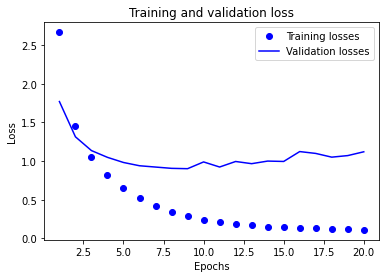

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict["loss"]
val_loss_values = history_dict['val_loss']

epochs = np.arange(1, 21, 1)

plt.plot(epochs, loss_values, 'bo', label='Training losses')
plt.plot(epochs, val_loss_values, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [46]:
history_dict

{'loss': [2.6654012203216553,
  1.4549065828323364,
  1.0565136671066284,
  0.8227218389511108,
  0.6495909690856934,
  0.5223719477653503,
  0.4170351028442383,
  0.34484967589378357,
  0.2843613624572754,
  0.23963087797164917,
  0.20687267184257507,
  0.18491479754447937,
  0.1677272915840149,
  0.1527101993560791,
  0.1437409222126007,
  0.1303461492061615,
  0.12777243554592133,
  0.12100819498300552,
  0.11995381861925125,
  0.10937800258398056],
 'accuracy': [0.5330744385719299,
  0.7052116990089417,
  0.7805061340332031,
  0.8272362947463989,
  0.8634427189826965,
  0.8938862681388855,
  0.9124279618263245,
  0.9279628992080688,
  0.9399899840354919,
  0.9456276893615723,
  0.9498872756958008,
  0.9505136609077454,
  0.9541468024253845,
  0.9532698392868042,
  0.9553996324539185,
  0.9581558704376221,
  0.9562765955924988,
  0.9561513662338257,
  0.9569030404090881,
  0.9599097967147827],
 'val_loss': [1.7692245244979858,
  1.313234806060791,
  1.1351487636566162,
  1.047662377

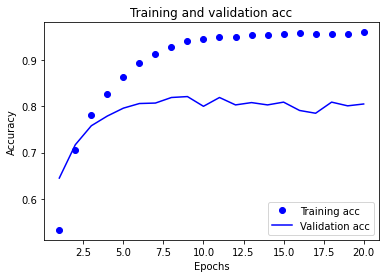

In [48]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()